/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


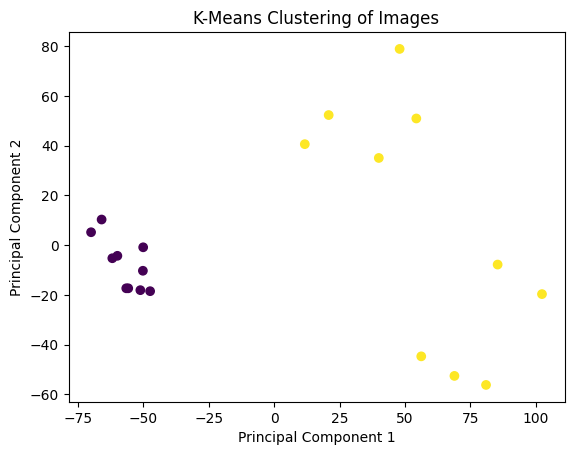

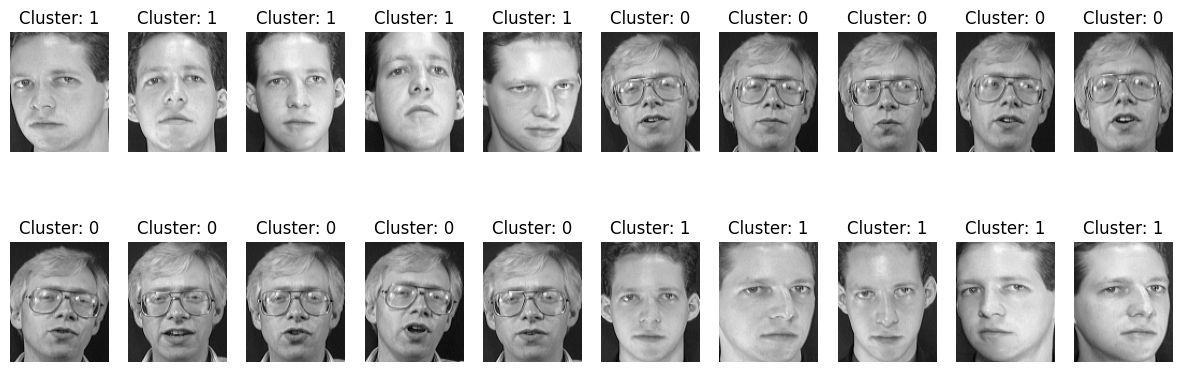

In [7]:
import os
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from PIL import Image

# Assuming you have a list of image file paths
image_paths = [
"/content/drive/MyDrive/Colab Notebooks/4- Classification with one hidden layer (optional)/DataSet/s1/6.pgm",
"/content/drive/MyDrive/Colab Notebooks/4- Classification with one hidden layer (optional)/DataSet/s1/7.pgm",
"/content/drive/MyDrive/Colab Notebooks/4- Classification with one hidden layer (optional)/DataSet/s1/8.pgm",
"/content/drive/MyDrive/Colab Notebooks/4- Classification with one hidden layer (optional)/DataSet/s1/9.pgm",
"/content/drive/MyDrive/Colab Notebooks/4- Classification with one hidden layer (optional)/DataSet/s1/10.pgm",
"/content/drive/MyDrive/Colab Notebooks/4- Classification with one hidden layer (optional)/DataSet/s2/1.pgm",
"/content/drive/MyDrive/Colab Notebooks/4- Classification with one hidden layer (optional)/DataSet/s2/2.pgm",
"/content/drive/MyDrive/Colab Notebooks/4- Classification with one hidden layer (optional)/DataSet/s2/3.pgm",
"/content/drive/MyDrive/Colab Notebooks/4- Classification with one hidden layer (optional)/DataSet/s2/4.pgm",
"/content/drive/MyDrive/Colab Notebooks/4- Classification with one hidden layer (optional)/DataSet/s2/5.pgm",
"/content/drive/MyDrive/Colab Notebooks/4- Classification with one hidden layer (optional)/DataSet/s2/6.pgm",
"/content/drive/MyDrive/Colab Notebooks/4- Classification with one hidden layer (optional)/DataSet/s2/7.pgm",
"/content/drive/MyDrive/Colab Notebooks/4- Classification with one hidden layer (optional)/DataSet/s2/8.pgm",
"/content/drive/MyDrive/Colab Notebooks/4- Classification with one hidden layer (optional)/DataSet/s2/9.pgm",
"/content/drive/MyDrive/Colab Notebooks/4- Classification with one hidden layer (optional)/DataSet/s2/10.pgm",
"/content/drive/MyDrive/Colab Notebooks/4- Classification with one hidden layer (optional)/DataSet/s1/1.pgm",
"/content/drive/MyDrive/Colab Notebooks/4- Classification with one hidden layer (optional)/DataSet/s1/2.pgm",
"/content/drive/MyDrive/Colab Notebooks/4- Classification with one hidden layer (optional)/DataSet/s1/3.pgm",
"/content/drive/MyDrive/Colab Notebooks/4- Classification with one hidden layer (optional)/DataSet/s1/4.pgm",
"/content/drive/MyDrive/Colab Notebooks/4- Classification with one hidden layer (optional)/DataSet/s1/5.pgm",

]

# Load and preprocess images
images = [np.array(Image.open(os.path.join(path)).convert('L')) for path in image_paths]

# Flatten the images
flattened_images = [image.flatten() for image in images]

# Standardize the data
scaler = StandardScaler()
standardized_images = scaler.fit_transform(flattened_images)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
reduced_images = pca.fit_transform(standardized_images)

# Use K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=42)  # Adjust the number of clusters as needed
clusters = kmeans.fit_predict(reduced_images)

# Visualize the results
plt.scatter(reduced_images[:, 0], reduced_images[:, 1], c=clusters, cmap='viridis')
plt.title('K-Means Clustering of Images')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()



# Create a 2x10 figure
fig, axes = plt.subplots(2, 10, figsize=(15, 5))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Show each image in their respective clusters
for i, path in enumerate(image_paths):
    img = Image.open(path)
    cluster_label = clusters[i]

    axes[i].imshow(img, cmap='gray')
    axes[i].set_title(f'Cluster: {cluster_label}')
    axes[i].axis('off')

plt.show()


In [22]:

import os
import numpy as np
from PIL import Image
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Your existing code here...

# Path to your dataset
dataset_path = "/content/drive/MyDrive/Colab Notebooks/Images"

# Get a list of folder names (assuming they are named 1, 2, 3, ..., 120)
folder_names = [str(i) for i in range(1, 121)]

# List to store clustering results for each folder
all_folder_clusters = []

cntr = 0

for folder_name in folder_names:
    # Construct the path to the current folder
    folder_path = os.path.join(dataset_path, folder_name)

    # Get a list of image file paths in the current folder
    image_paths = [os.path.join(folder_path, filename) for filename in os.listdir(folder_path) if filename.endswith('.png')]

    # Check if there are at least 5 images in the folder
    if len(image_paths) <= 5:
        print(f"Skipping folder {folder_name} as it has less than 5 images.")
        continue
    cntr = cntr + 1
    # Load and preprocess images
    images = [np.array(Image.open(path).convert('L')) for path in image_paths]

    # Flatten the images
    flattened_images = [image.flatten() for image in images]

    # Standardize the data
    scaler = StandardScaler()
    standardized_images = scaler.fit_transform(flattened_images)

    # Check the number of features after standardization
    num_features = standardized_images.shape[0]

    # Apply PCA for dimensionality reduction
    n_components = min(2, num_features)  # Ensure n_components is not greater than the number of features
    pca = PCA(n_components)
    reduced_images = pca.fit_transform(standardized_images)

    # Use K-Means clustering
    kmeans = KMeans(n_clusters=2, random_state=42, n_init='auto')
    clusters = kmeans.fit_predict(reduced_images)


    # Append the clustering results for the current folder to the list
    all_folder_clusters.append(clusters)


Skipping folder 2 as it has less than 5 images.
Skipping folder 3 as it has less than 5 images.
Skipping folder 6 as it has less than 5 images.
Skipping folder 7 as it has less than 5 images.
Skipping folder 9 as it has less than 5 images.
Skipping folder 12 as it has less than 5 images.
Skipping folder 13 as it has less than 5 images.
Skipping folder 18 as it has less than 5 images.
Skipping folder 21 as it has less than 5 images.
Skipping folder 24 as it has less than 5 images.
Skipping folder 25 as it has less than 5 images.
Skipping folder 27 as it has less than 5 images.
Skipping folder 28 as it has less than 5 images.
Skipping folder 31 as it has less than 5 images.
Skipping folder 36 as it has less than 5 images.
Skipping folder 37 as it has less than 5 images.
Skipping folder 38 as it has less than 5 images.
Skipping folder 40 as it has less than 5 images.
Skipping folder 41 as it has less than 5 images.
Skipping folder 42 as it has less than 5 images.
Skipping folder 46 as it 

In [24]:
for folder in all_folder_clusters:
    print(f"Length: {len(folder)}")

Length: 14
Length: 40
Length: 14
Length: 39
Length: 40
Length: 30
Length: 14
Length: 21
Length: 21
Length: 13
Length: 21
Length: 14
Length: 13
Length: 21
Length: 52
Length: 41
Length: 14
Length: 22
Length: 52
Length: 22
Length: 29
Length: 52
Length: 30
Length: 13
Length: 30
Length: 14
Length: 38
Length: 53
Length: 14
Length: 28
Length: 40
Length: 14
Length: 21
Length: 50
Length: 30
Length: 30
Length: 41
Length: 52
Length: 51
Length: 48
Length: 21
Length: 53
Length: 40
Length: 21
Length: 20
Length: 39
Length: 40
Length: 41
Length: 49
Length: 21
Length: 21
Length: 30
Length: 39
Length: 14
Length: 30
Length: 38
Length: 30
Length: 30
Length: 30
Length: 14
Length: 51
Length: 28
Length: 21
Length: 13
Length: 40
Length: 49
Length: 50
Length: 20
Length: 48
Length: 30
Length: 14
Length: 41
Length: 29
Length: 21
Length: 14
Length: 53
Length: 53
Length: 21
Length: 39
Length: 30


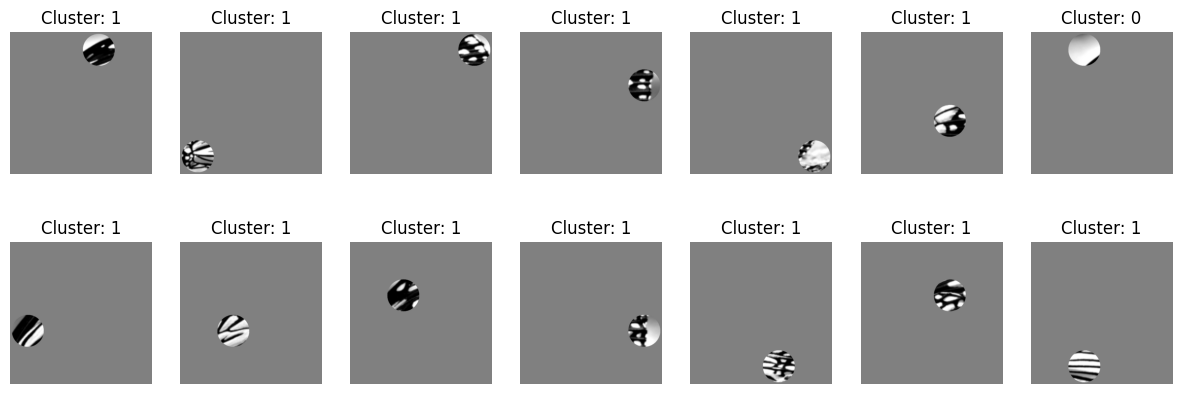

In [26]:
fig, axes = plt.subplots(2, 7, figsize=(15, 5))

clusters = all_folder_clusters[0]
image_folder = "/content/drive/MyDrive/Colab Notebooks/Images/1"
image_paths = [os.path.join(image_folder, file) for file in os.listdir(image_folder) if file.endswith(('.png', '.jpg', '.jpeg'))]
axes = axes.flatten()

# Show each image in their respective clusters
for i, path in enumerate(image_paths):
    img = Image.open(path)
    cluster_label = clusters[i]

    axes[i].imshow(img, cmap='gray')
    axes[i].set_title(f'Cluster: {cluster_label}')
    axes[i].axis('off')

plt.show()

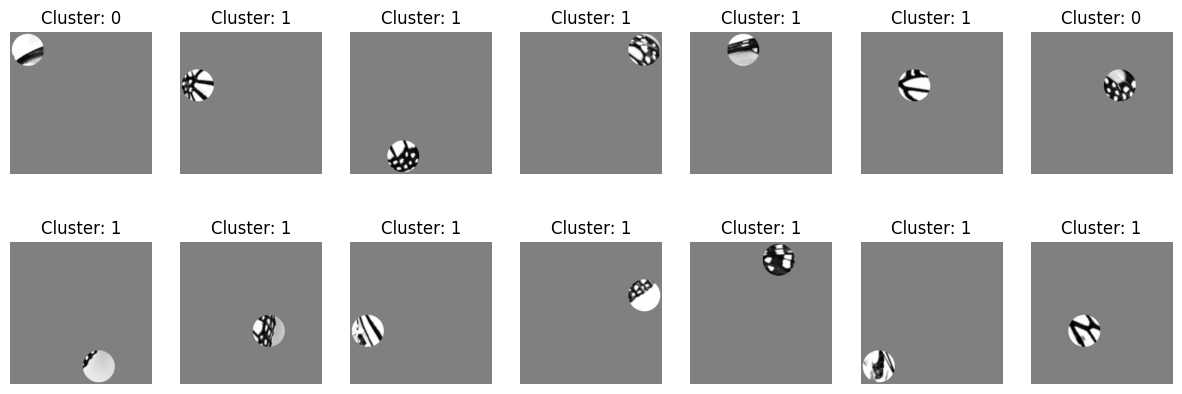

In [37]:
fig, axes = plt.subplots(2, 7, figsize=(15, 5))

clusters = all_folder_clusters[2]
image_folder = "/content/drive/MyDrive/Colab Notebooks/Images/5"
image_paths = [os.path.join(image_folder, file) for file in os.listdir(image_folder) if file.endswith(('.png', '.jpg', '.jpeg'))]
axes = axes.flatten()

# Show each image in their respective clusters
for i, path in enumerate(image_paths):
    img = Image.open(path)
    cluster_label = clusters[i]

    axes[i].imshow(img, cmap='gray')
    axes[i].set_title(f'Cluster: {cluster_label}')
    axes[i].axis('off')

plt.show()

40
['/content/drive/MyDrive/Colab Notebooks/Images/4/image26.png', '/content/drive/MyDrive/Colab Notebooks/Images/4/image21.png', '/content/drive/MyDrive/Colab Notebooks/Images/4/image22.png', '/content/drive/MyDrive/Colab Notebooks/Images/4/image24.png', '/content/drive/MyDrive/Colab Notebooks/Images/4/image28.png', '/content/drive/MyDrive/Colab Notebooks/Images/4/image23.png', '/content/drive/MyDrive/Colab Notebooks/Images/4/image27.png', '/content/drive/MyDrive/Colab Notebooks/Images/4/image29.png', '/content/drive/MyDrive/Colab Notebooks/Images/4/image25.png', '/content/drive/MyDrive/Colab Notebooks/Images/4/image20.png', '/content/drive/MyDrive/Colab Notebooks/Images/4/image2.png', '/content/drive/MyDrive/Colab Notebooks/Images/4/image19.png', '/content/drive/MyDrive/Colab Notebooks/Images/4/image13.png', '/content/drive/MyDrive/Colab Notebooks/Images/4/image12.png', '/content/drive/MyDrive/Colab Notebooks/Images/4/image17.png', '/content/drive/MyDrive/Colab Notebooks/Images/4/ima

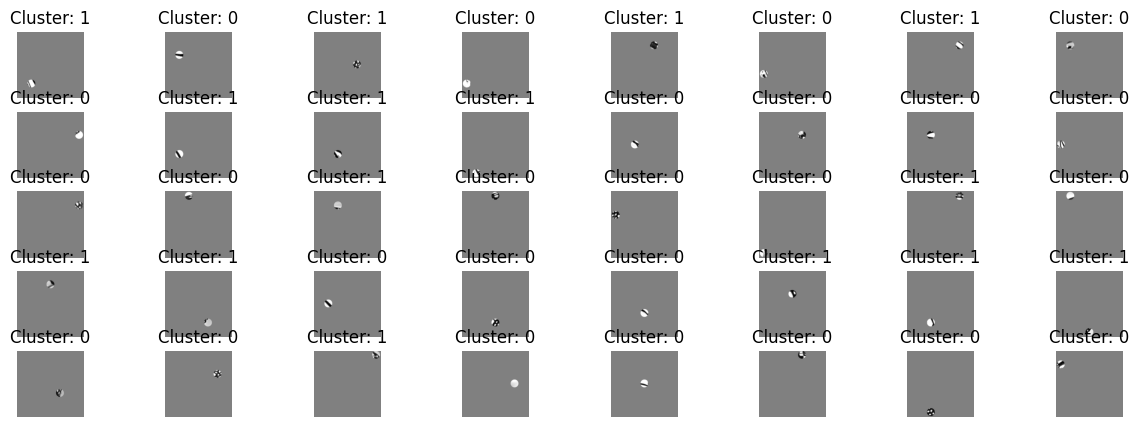

In [38]:
fig, axes = plt.subplots(5, 8, figsize=(15, 5))

clusters = all_folder_clusters[1]
print(clusters.size)
image_folder = "/content/drive/MyDrive/Colab Notebooks/Images/4"
image_paths = [os.path.join(image_folder, file) for file in os.listdir(image_folder) if file.endswith(('.png', '.jpg', '.jpeg'))]
axes = axes.flatten()
print(image_paths)
# Show each image in their respective clusters
for i, path in enumerate(image_paths):
    img = Image.open(path)
    cluster_label = clusters[i]

    axes[i].imshow(img, cmap='gray')
    axes[i].set_title(f'Cluster: {cluster_label}')
    axes[i].axis('off')

plt.show()